In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.autograph.set_verbosity(0)

In [14]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
# make_blobs function makes a training dataset with given categories and centers
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [15]:
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)

In [16]:
# plot multiclass data
def plt_mc_data(ax, X, y, classes, class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        # find the indexes of the current class
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                   c=col, vmin=0, vmax=map.N, cmap=map,
                   s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

In [17]:
# plot multiclass training set
def plt_mc(X_train, y_train, classes, centers, std):
    # list of classes
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    # plot the data
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=50, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    # plot a circle around each data category
   #  for c in css:
   #     circ = plt.Circle(centers[c], 2*std, color=dkcolors_map(c), clip_on=False, fill=False, lw=0.5)
   #     ax.add_patch(circ)
    plt.show()

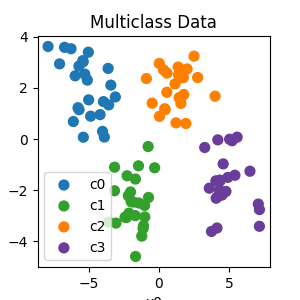

In [18]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [19]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [20]:
tf.random.set_seed(13)  # applied to achieve consistent results
# create the model
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")    # use linear due to numerically stability
    ]
)

In [21]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   # from_logits=True specifies that the output activation was linear rather than a softmanx
    optimizer=tf.keras.optimizers.Adam(0.01),   # adam optimizer with initial learning rate 0.01. use to automatically adapt learning rate of gradient descent
)

# fit the data on the model
model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5995  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3953 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2392 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1337 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0687 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0283 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0020 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9819 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9630 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9428 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9202 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8953 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8689 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8418 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8148 
Epoch 16/200
4/4 ━

In [22]:
# plot a multi-class categorical decision boundary
# this version handles a non-vector prediction (adds a for-loop over points)
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):
    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min()- 0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()- 0.5, X[:, 1].max()+0.5
    h = max(x_max-x_min, y_max-y_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    print("points", points.shape)
    print("xx.shape", xx.shape)

    # make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    # contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    ax.axis('tight')

In [23]:
def plt_cat_mc(X_train, y_train, model, classes):
    # make a model for plotting routines to call
    model_predict = lambda Xl: np.argmax(model.predict(Xl),axis=1)

    fig,ax = plt.subplots(1,1, figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
 
    # add the original data to the decison boundary
    plt_mc_data(ax, X_train,y_train, classes, map=dkcolors_map, legend=True)
    # plot the decison boundary. 
    plot_cat_decision_boundary_mc(ax, X_train, model_predict, vector=True)
    ax.set_title("model decision boundary")

    plt.xlabel(r'$x_0$');
    plt.ylabel(r"$x_1$"); 
    plt.show()

points (5858, 2)
xx.shape (58, 101)
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


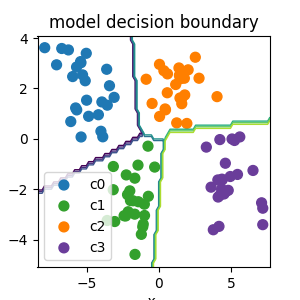

In [24]:
plt_cat_mc(X_train, y_train, model, classes)